Pontifícia Universidade Católica de São Paulo 

`Ciência de Dados e Inteligência Artificial`

🎓 Laboratório 6 - Classificador Naive Bayes

---
> 👨‍🏫*Professor Rooney Coelho (rracoelho@pucsp.br)*
---


Suponha que você seja um gerente de produto e queira classificar as avaliações dos clientes em classes positivas e negativas. Ou Como gerente de empréstimos, você deseja identificar quais solicitantes de empréstimos são seguros ou arriscados? Como analista de saúde, você deseja prever quais pacientes podem sofrer de diabetes. Todos os exemplos têm o mesmo tipo de problema para classificar avaliações, solicitantes de empréstimos e pacientes. 

Naive Bayes é o algoritmo de classificação mais direto e rápido, adequado para uma grande quantidade de dados. O classificador Naive Bayes é usado com sucesso em várias aplicações, como filtragem de spam, classificação de texto, análise de sentimentos e sistemas de recomendação. Ele usa o teorema de probabilidade de Bayes para predição de classe desconhecida.

Naive Bayes é o algoritmo mais direto e potente. Apesar dos avanços significativos do Machine Learning nos últimos dois anos, ele provou seu valor. Ele foi implantado com sucesso em muitos aplicativos, desde análise de texto até mecanismos de recomendação.

**Vantagens**
* Não é apenas uma abordagem simples, mas também um método rápido e preciso de previsão.
* Naive Bayes tem um custo computacional muito baixo.
* Ele pode trabalhar com eficiência em um grande conjunto de dados.
* Ele funciona bem no caso de variável de resposta discreta em comparação com a variável contínua.
* Ele pode ser usado com problemas de previsão de várias classes.
* Ele também funciona bem no caso de problemas de análise de texto.
* Quando a suposição de independência é válida, um classificador Naive Bayes tem um desempenho melhor em comparação com outros modelos, como regressão logística.


**Desvantagens**
* A suposição de características independentes. Na prática, é quase impossível que o modelo obtenha um conjunto de preditores totalmente independentes.
* Se não houver nenhuma tupla de treinamento de uma classe específica, isso causa probabilidade posterior zero. Nesse caso, o modelo é incapaz de fazer previsões. Este problema é conhecido como Zero Probability/Frequency Problem.

## O que é classificador Naive Bayes?

Naive Bayes é uma técnica de classificação estatística baseada no Teorema de Bayes. É um dos algoritmos de aprendizado supervisionado mais simples. O classificador Naive Bayes é o algoritmo rápido, preciso e confiável. Os classificadores Naive Bayes têm alta precisão e velocidade em grandes conjuntos de dados.

O classificador Naive Bayes assume que o efeito de um determinado recurso em uma classe é independente de outros recursos. Por exemplo, um solicitante de empréstimo é desejável ou não, dependendo de sua renda, histórico de empréstimos e transações anteriores, idade e localização. Mesmo que esses recursos sejam interdependentes, eles ainda são considerados de forma independente. Essa suposição simplifica a computação e é por isso que é considerada **ingênua** (Naive). Essa suposição é chamada de independência condicional de classe.

$$
P(A|B) = \frac{P(B|A) P(A)}{P(B)}
$$

* $P(A)$: a probabilidade da hipótese A ser verdadeira (independentemente dos dados). Isso é conhecido como a probabilidade anterior de A.
* $P(B)$: a probabilidade dos dados (independentemente da hipótese). Isso é conhecido como a probabilidade anterior.
* $P(A|B)$: a probabilidade da hipótese A dado os dados B. Isso é conhecido como probabilidade posterior.
* $P(B|A)$: a probabilidade de A dado que a hipótese B era verdadeira. Isso é conhecido como probabilidade posterior.

## Como funciona o classificador Naive Bayes?

Dado um exemplo de condições meteorológicas e praticar esportes. Você precisa calcular a probabilidade de praticar esportes. Agora, você precisa classificar se os jogadores vão jogar ou não, com base nas condições climáticas.

### Primeira abordagem (no caso de um único recurso)
O classificador Naive Bayes calcula a probabilidade de um evento nas seguintes etapas:
1. Calcular a probabilidade anterior para determinados rótulos de classe
2. encontre a probabilidade de verossimilhança com cada atributo para cada classe
3. Colocar esses valores na Fórmula Bayes e calcule a probabilidade posterior.
4. Veja qual classe tem maior probabilidade, dado que a entrada pertence à classe de maior probabilidade.

Para simplificar o cálculo de probabilidade anterior e posterior, você pode usar as duas tabelas de frequência e de probabilidade. Ambas as tabelas ajudarão você a calcular a probabilidade anterior e posterior. A tabela Frequência contém a ocorrência de rótulos para todos os recursos. Existem duas tabelas de probabilidade. A Tabela de Verossimilhança 1 mostra as probabilidades anteriores de rótulos e a Tabela de Verossimilhança 2 mostra a probabilidade posterior.

<center><img src="https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1543836883/image_4_lyi0ob.png"/></center>

**A probabilidade de jogar é:**

$$
P(Yes | Overcast) = \frac{P(Overcast | Yes) ~P(Yes)}{P(Overcast)} 
$$

* Cálculo da probabiladade anterior

$$P(Overcast) = 4/14 = 0.29$$

$$P(Yes)= 9/14 = 0.64$$

* Cálculo da probabilidade posterior

$$P(Overcast |Yes) = 4/9 = 0.44$$

* Substituir na equação

$$P (Yes | Overcast) = \frac{0.44 * 0.64}{0.29} = 0.98 $$

**A probabilidade de não jogar é:**

$$
P(No | Overcast) = \frac{P(Overcast | No) ~P(No)}{P(Overcast)} 
$$

* Cálculo da probabiladade anterior

$$P(Overcast) = 4/14 = 0.29$$

$$P(No)= 5/14 = 0.36$$

* Cálculo da probabilidade posterior

$$P(Overcast |No) = 0/9 = 0$$

* Substituir na equação

$$P (No | Overcast) = \frac{0 * 0.36}{0.29} = 0$$

> A probabilidade de uma classe 'Sim' é maior. Assim, você pode determinar aqui se o tempo está nublado do que os jogadores vão praticar o esporte.

Note que somente o numerador da equação é necessário para a classificação!

### Segunda abordagem (no caso de vários recursos)

1. Calcular a probabilidade anterior para determinados rótulos de classe

2. Calcule a probabilidade condicional com cada atributo para cada classe

3. Multiplicar a probabilidade condicional da mesma classe

4. Veja qual classe tem maior probabilidade, a classe de maior probabilidade pertence a determinada etapa de conjunto de entrada

### Criando o classificador no Scikit Learn

Vamos treinar um modelo para saber se uma pessoa irá jogar (play) baseado no tempo e temperatura. Importe os dados executando a célula a seguir:

In [44]:
import pandas as pd

df = pd.DataFrame({
    'weather': ['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast','Sunny','Sunny', 'Rainy','Sunny','Overcast','Overcast','Rainy'], 
    'temp': ['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild','Mild','Hot','Mild'],
    'play':['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']
    })
df    

,weather,temp,play
0,Sunny,Hot,No
1,Sunny,Hot,No
2,Overcast,Hot,Yes
3,Rainy,Mild,Yes
4,Rainy,Cool,Yes
5,Rainy,Cool,No
6,Overcast,Cool,Yes
7,Sunny,Mild,No
8,Sunny,Cool,Yes
9,Rainy,Mild,Yes


Faça a encodificação dos valores categóricos em números (fatores):

In [46]:
def to_numeric(data):
    # key_lst = []
    # [key_lst.append((data[i].unique()).tolist()) for i in data.columns]
    # value_lst = [i for i in data.columns]
    # #dic_cat = dict(zip(key_lst, value_lst))
    new_data = data.copy()
    cat_columns = new_data.select_dtypes(['object']).columns
    new_data[cat_columns] = new_data[cat_columns].apply(lambda i: pd.factorize(i)[0])
    return new_data

In [49]:
num_df = to_numeric(df)
num_df.head()

,weather,temp,play
0,0,0,0
1,0,0,0
2,1,0,1
3,2,1,1
4,2,2,1


**Classificador Naive Bayes para modelos multinomiais.**

O classificador multinomial Naive Bayes é adequado para classificação com características discretas (por exemplo, contagem de palavras para classificação de texto). A distribuição multinomial normalmente requer contagens de recursos inteiros. No entanto, na prática, contagens fracionárias como tf-idf também podem funcionar.

Importe aqui o classificador Multinomial Naive Bayes do Scikit Learn:

In [48]:
from sklearn.naive_bayes import MultinomialNB

Treine o modelo para a totalidade do conjunto de dados. Lembres-se que nossas features são `weather` e	`temp` e nosso target é `play`.

In [50]:
features = num_df.drop('play', axis=1)
target = num_df['play']
nb = MultinomialNB()
nb.fit(features, target)

MultinomialNB()

Faça agora a previsão para `weather -> Overcast` e `temp -> Mild`.

In [53]:
nb.predict([[1, 1]])

C:\Users\ISAAC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  "X does not have valid feature names, but"


array([1], dtype=int64)

## Configurando o classificador para o Wine dataset

Na parte de construção do modelo, você pode usar o conjunto de dados do vinho, que é um problema de classificação multiclasse muito famoso. “Este conjunto de dados é o resultado de uma análise química de vinhos cultivados na mesma região da Itália, mas derivados de três cultivares diferentes”. (UC Irvine) 

O conjunto de dados é composto por 13 características (álcool, málico_ácido, cinzas, alcalinidade_de_cinza, magnésio, totais_fenóis, flavonóides, não flavonóides_fenóis, proantocianinas, color_intensity, matiz, od280/od315_of_diluted_wines, prolina) e tipo de cultivar de vinho. 

Esses dados têm três tipos de vinho Class_0, Class_1 e Class_3. Aqui você pode construir um modelo para classificar o tipo de vinho. O conjunto de dados está disponível na biblioteca scikit-learn.

Como temos dados contínuos no conjuento de dados usaremos o `Gaussian Naive Bayes`.

In [54]:
from sklearn import datasets

wine = datasets.load_wine()

Converta esses dados para um DataFrame do Pandas:

In [55]:
X = pd.DataFrame(data = wine.data, columns= wine.feature_names)

In [56]:
y = pd.Series(data = wine.target, name='target')

Faça a divisão dos dados em 30% para teste e 70% para treino. Use `random_state=109 ` como semente de números aleatórios.

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=109)

Use o `Gaussian Naive Bayes` para treinar um classificador para esse conjunto de dados. Faça o treinamento somente com os dados destinados para treino:

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [58]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

Faça a previsão para os dados separados para teste e calcule a precisão do modelo:

In [70]:
y_pred = gnb.predict(X_test)
y_pred

array([0, 0, 1, 2, 0, 1, 0, 0, 1, 0, 2, 2, 2, 2, 0, 1, 1, 0, 0, 1, 2, 1,
       0, 2, 0, 0, 1, 2, 0, 1, 2, 1, 1, 0, 1, 1, 0, 2, 2, 0, 2, 1, 0, 0,
       0, 2, 2, 0, 1, 1, 2, 0, 0, 2])

In [75]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

In [76]:
def plt_confusion_matrix(y_test, y_pred, model):
    acc= accuracy_score(y_test, y_pred)
    prec= precision_score(y_test, y_pred, average='micro')
    rec= recall_score(y_test, y_pred, average='micro')
    f1= f1_score(y_test, y_pred, average='micro')
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()
    plt.xlabel(f'Predicted value\n\nAccuracy = {acc:.2f}\n\nPrecision = {prec:.2f}\n\nRecall = {rec:.2f}\n\nF1-Score = {f1:.2f}').set_fontsize(15)
    plt.ylabel('True value').set_fontsize(15)
    plt.show()

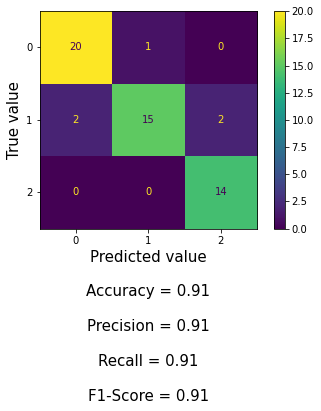

In [77]:
plt_confusion_matrix(y_test, y_pred, gnb)

Use agora dos dados em 30% para teste e 70% para treino. Use `random_state=42 ` como semente de números aleatórios.

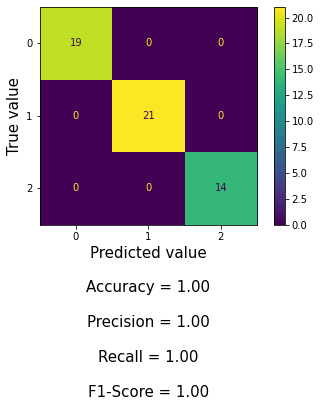

In [78]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.3, random_state=42)
gnb.fit(X_train2, y_train2)
y_pred2 = gnb.predict(X_test2)
plt_confusion_matrix(y_test2, y_pred2, gnb)

## Contornando o Problema de Probabilidade Zero

Suponha que não haja tupla para um empréstimo arriscado no conjunto de dados, nesse cenário, a probabilidade a posteriori será zero e o modelo não consegue fazer uma previsão. Esse problema é conhecido como **Probabilidade Zero** porque a ocorrência da classe específica é zero. 

A solução para tal problema é a correção Laplaciana ou Transformação de Laplace. A correção Laplaciana é uma das técnicas de suavização. Aqui, você pode supor que o conjunto de dados é grande o suficiente para que a adição de uma linha de cada classe não faça diferença na probabilidade estimada. Isso superará a questão dos valores de probabilidade para zero. 

Por exemplo: suponha que para a classe empréstimo arriscado, existam 1000 linhas de treinamento no banco de dados. Neste banco de dados, a coluna de renda tem 0 correspondências para baixa renda, 990 para renda média e 10 para alta renda. As probabilidades desses eventos, sem a correção Laplaciana, são `0`, 0.990 (de 990/1000) e 0.010 (de 10/1000) 

Agora, aplique a correção Laplaciana no conjunto de dados fornecido. Vamos adicionar mais 1  para cada par renda-valor. As probabilidades desses eventos:

$$
\frac{1}{1003} = 0.001 \qquad \frac{991}{1003}=0.988 \qquad \frac{11}{1003} = 0.011
$$

Uma vez que realizamos multiplicações nas probabilidades o zero nos será um problema que é corrgido através desta técnica simples.